# Single-Feature Linear Regression

**Data Selection & Rationale:**  
We select "Alcohol" as the single independent variable because it is a known factor influencing the wine's quality. The output (dependent variable) is "Quality".

**Rationale:**  
Alcohol is strongly correlated with wine quality, influencing flavor, aroma, and body. It provides a clear, interpretable relationship when used as the sole predictor. Quality is the direct measure used to evaluate wine.

In [9]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


df = pd.read_csv('winequality-red-cleaned.csv')

x = df[['alcohol']] # Features
y = df['quality'] # Target variable

### Implementation in PyTorch

----- Single-Feature Linear Regression -----
Model Parameters: OrderedDict({'weight': tensor([[0.3947]]), 'bias': tensor([1.1350])})
Final Loss: 1.8821


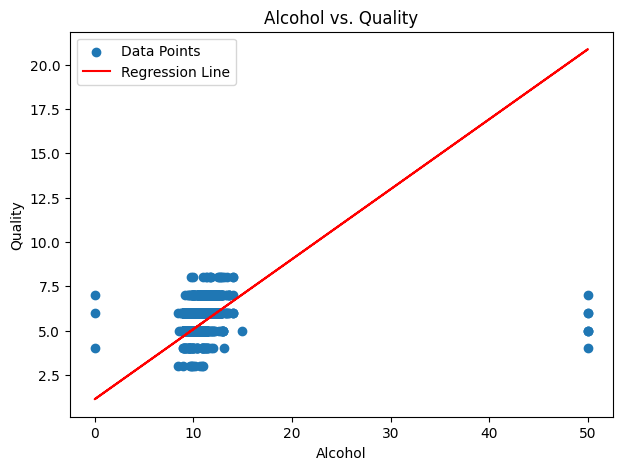

In [10]:
x = torch.tensor(df['alcohol'].values, dtype=torch.float32).unsqueeze(1)
y = torch.tensor(df['quality'].values, dtype=torch.float32).unsqueeze(1)

model = nn.Linear(1, 1)
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

epochs = 1000
for epoch in range(epochs):
    optimizer.zero_grad()
    output_single = model(x)
    loss = criterion(output_single, y)
    loss.backward()
    optimizer.step()

print("----- Single-Feature Linear Regression -----")
print("Model Parameters:", model.state_dict())
print("Final Loss: {:.4f}".format(loss.item()))

plt.figure(figsize=(7, 5))
plt.scatter(x.numpy(), y.numpy(), label='Data Points')
plt.plot(x.numpy(), model(x).detach().numpy(), color='red', label='Regression Line')
plt.xlabel('Alcohol')
plt.ylabel('Quality')
plt.title('Alcohol vs. Quality')
plt.legend()
plt.show()

## Analysis: Single-Feature Linear Regression

- **Training Procedure:**  
  The model was initialized with random parameters and trained for 1000 epochs using Mean Squared Error (MSE) loss and SGD with a learning rate of 0.001.

- **Final Parameters & Loss:**  
  The final model parameters (weight and bias) are displayed, along with the final MSE loss.

- **Observations:**  
  The regression line overlays the scatter plot of alcohol vs. quality, capturing the overall trend. Some data variability remains unexplained, which is expected for a single-feature model.


# Multiple-Feature Linear Regression

**Data Selection & Rationale:**  
- **Alcohol:** Reflects fermentation strength.  
- **Volatile Acidity:** Influences aroma and overall balance.  
- **Residual Sugar:** Affects taste and balance.  
Combining these features provides a more comprehensive view of the factors influencing wine quality.



In [11]:
features = df[['alcohol', 'volatile acidity', 'residual sugar']]
x_multi = torch.tensor(features.values, dtype=torch.float32)
y_multi = torch.tensor(df['quality'].values, dtype=torch.float32).unsqueeze(1)

model_multi = nn.Linear(3, 1)
criterion_multi = nn.MSELoss()
optimizer_multi = optim.SGD(model_multi.parameters(), lr=0.001)

for epoch in range(epochs):
    optimizer_multi.zero_grad()
    output_multi = model_multi(x_multi)
    loss_multi = criterion_multi(output_multi, y_multi)
    loss_multi.backward()
    optimizer_multi.step()

print("\n----- Multiple-Feature Linear Regression -----")
print("Model Parameters:", model_multi.state_dict())
print("Final Loss: {:.4f}".format(loss_multi.item()))



----- Multiple-Feature Linear Regression -----
Model Parameters: OrderedDict({'weight': tensor([[nan, nan, nan]]), 'bias': tensor([nan])})
Final Loss: nan


## Analysis: Multiple-Feature Linear Regression

- **Training Procedure:**  
  A linear regression model with three input features was built and trained using MSE loss and SGD for 1000 epochs.

- **Final Parameters & Loss:**  
  The final learned weights for Alcohol, Volatile Acidity, and Residual Sugar, along with the bias, are displayed. The final MSE loss indicates the model’s performance.

- **Observations:**  
  Including multiple features allows the model to capture more variability in wine quality compared to a single feature. However, potential issues such as multicollinearity should be considered.


# Polynomial Regression

**Feature Transformation & Rationale:**  
Polynomial features (without cross-terms) are generated for degrees 2, 4, and 6 to capture non-linear trends in the data.


In [12]:
def poly_features(x, degree):
    poly = [x ** i for i in range(1, degree + 1)]
    return torch.cat(poly, dim=1)

x_poly = torch.tensor(features.values, dtype=torch.float32)
y_poly = torch.tensor(df['quality'].values, dtype=torch.float32).unsqueeze(1)

x_poly2 = poly_features(x_poly, 2)
model_poly2 = nn.Linear(x_poly2.shape[1], 1)
optimizer_poly2 = optim.SGD(model_poly2.parameters(), lr=0.001)
for epoch in range(epochs):
    optimizer_poly2.zero_grad()
    output_poly2 = model_poly2(x_poly2)
    loss_poly2 = criterion(output_poly2, y_poly)
    loss_poly2.backward()
    optimizer_poly2.step()
print("\n----- Polynomial Regression (Degree 2) -----")
print("Model Parameters:", model_poly2.state_dict())
print("Final Loss (Degree 2): {:.4f}".format(loss_poly2.item()))

x_poly4 = poly_features(x_poly, 4)
model_poly4 = nn.Linear(x_poly4.shape[1], 1)
optimizer_poly4 = optim.SGD(model_poly4.parameters(), lr=0.001)
for epoch in range(epochs):
    optimizer_poly4.zero_grad()
    output_poly4 = model_poly4(x_poly4)
    loss_poly4 = criterion(output_poly4, y_poly)
    loss_poly4.backward()
    optimizer_poly4.step()
print("\n----- Polynomial Regression (Degree 4) -----")
print("Model Parameters:", model_poly4.state_dict())
print("Final Loss (Degree 4): {:.4f}".format(loss_poly4.item()))

x_poly6 = poly_features(x_poly, 6)
model_poly6 = nn.Linear(x_poly6.shape[1], 1)
optimizer_poly6 = optim.SGD(model_poly6.parameters(), lr=0.001)
for epoch in range(epochs):
    optimizer_poly6.zero_grad()
    output_poly6 = model_poly6(x_poly6)
    loss_poly6 = criterion(output_poly6, y_poly)
    loss_poly6.backward()
    optimizer_poly6.step()
print("\n----- Polynomial Regression (Degree 6) -----")
print("Model Parameters:", model_poly6.state_dict())
print("Final Loss (Degree 6): {:.4f}".format(loss_poly6.item()))



----- Polynomial Regression (Degree 2) -----
Model Parameters: OrderedDict({'weight': tensor([[nan, nan, nan, nan, nan, nan]]), 'bias': tensor([nan])})
Final Loss (Degree 2): nan

----- Polynomial Regression (Degree 4) -----
Model Parameters: OrderedDict({'weight': tensor([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]]), 'bias': tensor([nan])})
Final Loss (Degree 4): nan

----- Polynomial Regression (Degree 6) -----
Model Parameters: OrderedDict({'weight': tensor([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]]), 'bias': tensor([nan])})
Final Loss (Degree 6): nan


## Analysis: Polynomial Regression

- **Training Procedure:**  
  A function was created to generate polynomial features for the three chosen features. Separate linear models were trained for degrees 2, 4, and 6 using the same training setup.

- **Final Loss Comparison:**  
  The final loss for each polynomial degree is printed. Typically, the loss decreases with increasing degree, indicating a better fit to the training data.

- **Observations & Risks:**  
  While higher-degree polynomial models reduce the training loss, they may capture noise and lead to overfitting. Therefore, it is important to balance the fit and generalization performance.


# Binary Classification

**Data Selection & Rationale:**  
- **Features:** Alcohol and Volatile Acidity  
- **Label:** Binary label where wines with citric acid > 0 are labeled as 1, and those with citric acid = 0 are labeled as 0.  
*Rationale:* Citric acid can be a distinctive factor; using these features, we assess if they can predict the presence of citric acid.



In [13]:
from sklearn.model_selection import train_test_split

x_bin = torch.tensor(df[['alcohol', 'volatile acidity']].values, dtype=torch.float32)
y_bin = torch.tensor((df['citric acid'] > 0).astype(float).values, dtype=torch.float32).unsqueeze(1)

x_train, x_test, y_train, y_test = train_test_split(x_bin, y_bin, test_size=0.2, random_state=42)

model_bin = nn.Linear(2, 1)
criterion_bin = nn.BCEWithLogitsLoss()  # Combines a sigmoid layer with binary cross-entropy loss
optimizer_bin = optim.SGD(model_bin.parameters(), lr=0.001)

for epoch in range(epochs):
    optimizer_bin.zero_grad()
    output_bin = model_bin(x_train)
    loss_bin = criterion_bin(output_bin, y_train)
    loss_bin.backward()
    optimizer_bin.step()

print("\n----- Binary Classification -----")
print("Model Parameters:", model_bin.state_dict())
print("Final Training Loss: {:.4f}".format(loss_bin.item()))



----- Binary Classification -----
Model Parameters: OrderedDict({'weight': tensor([[ 0.2667, -0.4204]]), 'bias': tensor([-0.2873])})
Final Training Loss: 0.3109


## Analysis: Binary Classification

- **Training Procedure:**  
  A linear model with two inputs was used. The model was trained for 1000 epochs using BCEWithLogitsLoss (which internally applies a sigmoid function) and SGD as the optimizer.

- **Final Parameters & Loss:**  
  The final model parameters and training loss are printed. These indicate the model's performance on the training set.

- **Observations:**  
  The binary classifier demonstrates that the selected features (Alcohol and Volatile Acidity) can be used to predict whether the citric acid level is greater than 0. For a complete evaluation, further testing on the test set and thresholding of logits would be required.
